In [0]:
#importing the libraries that will help with the implementation

%%capture
%pylab inline

import warnings
warnings.filterwarnings('ignore')
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import pandas as pd

import seaborn as sns
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

from wordcloud import WordCloud, STOPWORDS
from collections import Counter

np.random.seed(10)

from keras.utils import to_categorical
import random
from tensorflow import set_random_seed
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential

#set random seed for the session and also for tensorflow that runs in background for keras
set_random_seed(123)
random.seed(123)

In [0]:
#Read the data from the link provided

URL_Tr ='https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv'

df = pd.read_csv(URL_Tr,sep='\t')


In [101]:
df.count()

PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64

In [102]:
#total number of sentences

print('Total number of sentences : ' , len(df.SentenceId.unique()))


Total number of sentences :  8529


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


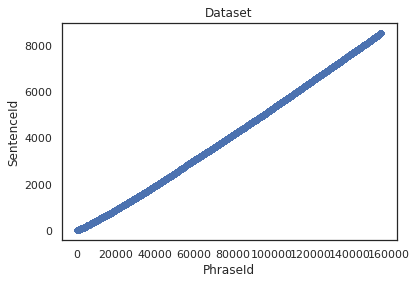

In [103]:
df.plot.scatter(x='PhraseId', y='SentenceId', title='Dataset')


In [104]:
# getting full sentences from the dataset
fullSent = df.loc[df.groupby('SentenceId')['PhraseId'].idxmin()]

fullSent.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
63,64,2,"This quiet , introspective and entertaining independent is worth seeking .",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",1
116,117,4,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",3
156,157,5,Aggressive self-glorification and a manipulative whitewash .,1


In [105]:
first_df = st_df = df.groupby('SentenceId' , as_index = False).first()
first_df

,SentenceId,PhraseId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,64,"This quiet , introspective and entertaining independent is worth seeking .",4
2,3,82,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",1
3,4,117,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",3
4,5,157,Aggressive self-glorification and a manipulative whitewash .,1
...,...,...,...,...
8524,8540,155985,... either you 're willing to go with this claustrophobic concept or you 're not .,2
8525,8541,155998,"Despite these annoyances , the capable Clayburgh and Tambor really do a great job of anchoring the characters in the emotional realities of middle age .",2
8526,8542,156022,-LRB- Tries -RRB- to parody a genre that 's already a joke in the United States .,1
8527,8543,156032,The movie 's downfall is to substitute plot for personality .,1


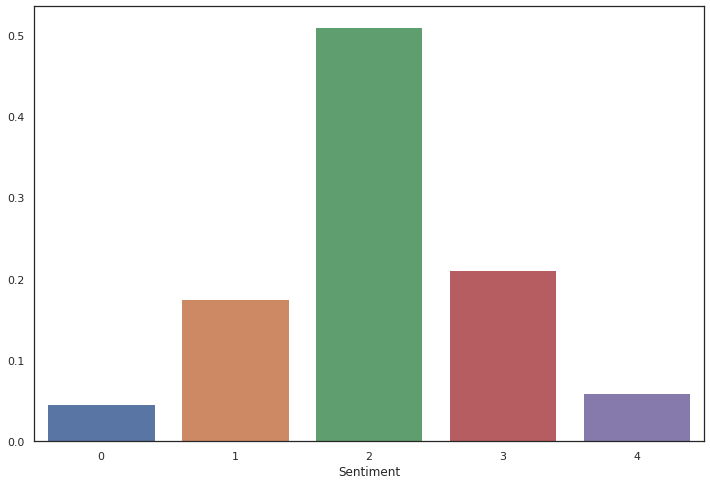

In [106]:
#Depicting the bar plot of most data per sentiment
distance = df.groupby(["Sentiment"]).size()
distance = distance / distance.sum()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(distance.keys(), distance.values);
fig.savefig('before.png')

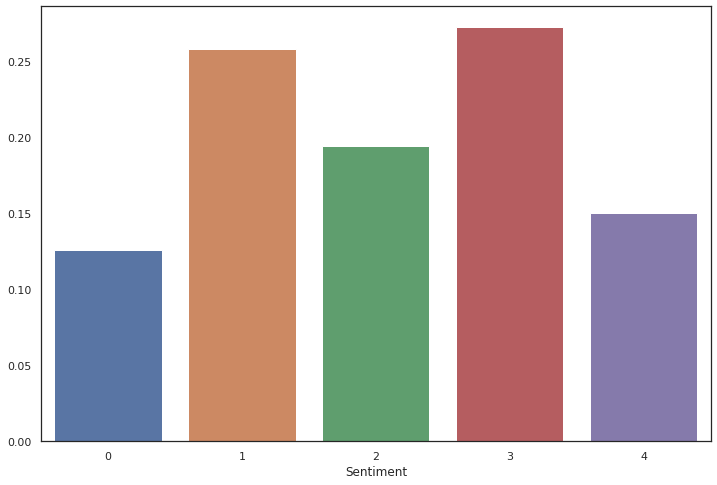

In [107]:
#depiction of full sentences per sentiments 
distance = first_df.groupby(["Sentiment"]).size()
distance = distance / distance.sum()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(distance.keys(), distance.values);
fig.savefig('AfterGraph.png')

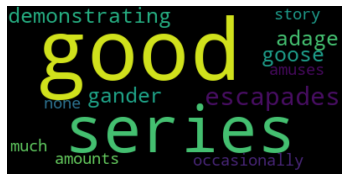

In [108]:
# Start with one review:
text = df.Phrase[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [109]:
#downloading the stop words for english language
StopWords = ENGLISH_STOP_WORDS
print(StopWords)

frozenset({'itself', 'my', 'describe', 'off', 'nevertheless', 'too', 'whither', 'elsewhere', 'once', 'fire', 'system', 'am', 'ltd', 'here', 'everyone', 'thereafter', 'myself', 'this', 'now', 'who', 'twelve', 'on', 'herein', 'inc', 'serious', 'another', 'himself', 'nothing', 'almost', 'without', 'put', 'move', 'beyond', 'indeed', 'how', 'per', 'so', 'towards', 'done', 'fifty', 'anything', 'and', 'take', 'ourselves', 'amongst', 'anywhere', 'her', 'keep', 'seem', 'thereupon', 'when', 'anyway', 'could', 'however', 'six', 'former', 'it', 'they', 'where', 'herself', 'most', 'can', 'had', 'interest', 'moreover', 'someone', 'each', 'couldnt', 'hereby', 'con', 'nowhere', 'all', 'except', 'thru', 'were', 'every', 'de', 'eg', 'whereby', 'then', 'hereupon', 'found', 'name', 'bottom', 'our', 'sincere', 'enough', 'their', 'many', 'those', 'since', 'nine', 'twenty', 'hundred', 'somehow', 'down', 'among', 'afterwards', 'onto', 'up', 'same', 'fifteen', 'than', 'over', 'whence', 'beside', 'see', 'well',

In [110]:
text = " ".join(review for review in df.Phrase)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6432359 words in the combination of all review.


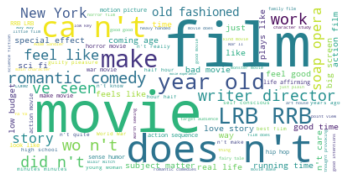

<Figure size 432x288 with 0 Axes>

In [111]:
# Create stopword list:
stopwords = set(StopWords)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generating a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('wordcloud.png')

In [112]:
#Performing Bag of word for the dataset
BOW_Vectorizer = CountVectorizer(strip_accents='unicode',
                                 stop_words=StopWords,
                                 ngram_range=(1,3),
                                 analyzer='word',
                                 min_df=5,
                                 max_df=0.5)

BOW_Vectorizer.fit(list(fullSent['Phrase']))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.5, max_features=None, min_df=5,
                ngram_range=(1, 3), preprocessor=None,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}),
                strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [113]:
#create tfidf vectorizer 
tfidf_vectorizer = TfidfVectorizer(min_df=5,
                                 max_df=5,
                                  analyzer='word',
                                  strip_accents='unicode',
                                  ngram_range=(1,3),
                                  sublinear_tf=True,
                                  smooth_idf=True,
                                  use_idf=True,
                                  stop_words=StopWords)

tfidf_vectorizer.fit(list(fullSent['Phrase']))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=5, max_features=None,
                min_df=5, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}),
                strip_accents='unicode', sublinear_tf=True,
                token_

In [114]:
#tfid
#build train dataset
phrase = fullSent['Phrase']
sentiment = fullSent['Sentiment']
phrase[0], sentiment[0]

('A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
 1)

In [0]:
#performing the cleansing operation on the dataset using lemmatizer from WordNetLemmatizer and SnowBallStemmer
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import SnowballStemmer,WordNetLemmatizer
stemmer=SnowballStemmer('english')
lemma=WordNetLemmatizer()
from string import punctuation
import re

In [0]:
def phrase_clean(review_col):
    review_corpus=[]
    for i in range(0,len(review_col)):
        review=str(review_col[i])
        review=re.sub('[^a-zA-Z]',' ',review)
        
        review=[lemma.lemmatize(w) for w in word_tokenize(str(review).lower())]
        review=' '.join(review)
        review_corpus.append(review)
    return review_corpus

In [117]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
df['phrase_clean']=phrase_clean(df.Phrase.values)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [118]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,phrase_clean
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,a series of escapade demonstrating the adage that what is good for the goose is also good for the gander some of which occasionally amuses but none of which amount to much of a story
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,a series of escapade demonstrating the adage that what is good for the goose
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series


In [0]:
from sklearn.utils import resample
new_2 = df[df['Sentiment']==2]
new_1 = df[df['Sentiment']==1]
new_3 = df[df['Sentiment']==3]
new_4 = df[df['Sentiment']==4]
new_5 = df[df['Sentiment']==0]
new_2_sample = resample(new_2,replace=True,n_samples=75000,random_state=2003)
new_1_sample = resample(new_1,replace=True,n_samples=75000,random_state=2003)
new_3_sample = resample(new_3,replace=True,n_samples=75000,random_state=2003)
new_4_sample = resample(new_4,replace=True,n_samples=75000,random_state=2003)
new_5_sample = resample(new_5,replace=True,n_samples=75000,random_state=2003)

df_upsampled = pd.concat([new_2, new_1_sample,new_3_sample,new_4_sample,new_5_sample])

In [120]:
df_upsampled.head()

,PhraseId,SentenceId,Phrase,Sentiment,phrase_clean
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,a series of escapade demonstrating the adage that what is good for the goose
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series
5,6,1,of escapades demonstrating the adage that what is good for the goose,2,of escapade demonstrating the adage that what is good for the goose


In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.tokenize import TweetTokenizer
import datetime
#import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score
#from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

#data processing 

pd.set_option('max_colwidth',400)
text = ' '.join(df_upsampled.loc[df_upsampled.Sentiment == 4, 'Phrase'].values)
text_trigrams = [i for i in ngrams(text.split(), 3)]

In [122]:
Counter(text_trigrams).most_common(30)

[(('one', 'of', 'the'), 1554),
 (('of', 'the', 'year'), 833),
 (('of', 'the', 'best'), 658),
 (('of', 'the', 'most'), 552),
 (('is', 'one', 'of'), 394),
 (('One', 'of', 'the'), 367),
 ((',', 'and', 'the'), 353),
 (('it', "'s", 'a'), 302),
 (('the', 'film', "'s"), 301),
 (('the', 'year', "'s"), 290),
 (('the', 'edge', 'of'), 283),
 (('of', 'your', 'seat'), 279),
 (('the', 'kind', 'of'), 277),
 (('.', 'is', 'a'), 274),
 (('It', "'s", 'a'), 273),
 ((',', 'the', 'film'), 269),
 (('a', 'movie', 'that'), 268),
 (('the', 'film', 'is'), 265),
 (('film', 'that', 'is'), 243),
 (('edge', 'of', 'your'), 243),
 (('as', 'one', 'of'), 243),
 ((',', 'this', 'is'), 240),
 ((',', 'it', "'s"), 214),
 (('a', 'film', 'that'), 207),
 (('as', 'well', 'as'), 204),
 (('some', 'of', 'the'), 196),
 (('of', 'the', 'film'), 195),
 ((',', 'funny', ','), 192),
 (('is', 'funny', ','), 192),
 (('in', 'its', 'own'), 189)]

In [0]:
tokenizer = TweetTokenizer()

In [0]:

vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(df_upsampled['phrase_clean'].values)
vectorizer.fit(full_text)
df_upsampled_vectorized = vectorizer.transform(df_upsampled['phrase_clean'])


In [0]:

y = df_upsampled['Sentiment']

In [126]:
#to perfrom the vectorisation and bring the data in vector form
from keras.utils import to_categorical
X = df_upsampled['phrase_clean']
#Y = train['Sentiment']
Y = to_categorical(df_upsampled['Sentiment'].values)
print(Y)

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [0]:

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=2003)

In [128]:
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)

(265707,) (265707, 5)
(113875,) (113875, 5)


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [130]:
#joining the different tokens and finding total number of words
all_words=' '.join(X_train)
all_words=word_tokenize(all_words)

dist=FreqDist(all_words)

num_unique_word=len(dist)
num_unique_word
#X_train.head()

13731

In [131]:
#finding the number of words for each phrase 
py_length=[]
for text in X_train:
    word=word_tokenize(text)
  #  print(text)
    l=len(word)
    py_length.append(l)
    
MAX_REVIEW_LEN=np.max(py_length)
MAX_REVIEW_LEN

48

In [0]:
max_features = num_unique_word
max_words = MAX_REVIEW_LEN
batch_size = 128
epochs = 5
num_classes=5

In [0]:
from keras import backend as K

def corelation(y_true, y_prediction):
    
    y_positive_prediction = K.round(K.clip(y_prediction, 0, 1))
    y_prediction_neg = 1 - y_positive_prediction


    y_positive = K.round(K.clip(y_true, 0, 1))
    y_negative = 1 - y_positive


    true_positive = K.sum(y_positive * y_positive_prediction)
    true_negative = K.sum(y_negative * y_prediction_neg)


    false_positive = K.sum(y_negative * y_positive_prediction)
    false_negative = K.sum(y_positive * y_prediction_neg)


    numer = (true_positive * true_negative - false_positive * false_negative)
    denom = K.sqrt((true_positive + false_positive) * (true_positive + false_negative) * (true_negative + false_positive) * (true_negative + false_negative))
 
 
    return numer / (denom + K.epsilon())

def recall(y_true, y_prediction):
    #Recall metric.
    #Computes the recall, a metric for multi-label classification of how many relevant items are selected.
    
    true_positives = K.sum(K.round(K.clip(y_true * y_prediction, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_prediction):
    #Precision metric.
    
    true_positives = K.sum(K.round(K.clip(y_true * y_prediction, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_prediction, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_prediction):
    def recall(y_true, y_prediction):
        #Recall metric.
        
        true_positives = K.sum(K.round(K.clip(y_true * y_prediction, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_prediction):
        #Precision metric.
        #Computes the precision, a metric for multi-label classification of how many selected items are relevant.
        
        true_positives = K.sum(K.round(K.clip(y_true * y_prediction, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_prediction, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    recall = recall(y_true, y_prediction)
    precision = precision(y_true, y_prediction)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [0]:
#tokenizing the words
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

#X_test = tokenizer.texts_to_sequences(X_train)
#X_test

In [0]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
#sequence padding for the model
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)
#X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#print(X_train.shape,X_val.shape)
#X_test

In [0]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
import keras


In [139]:
model2 = Sequential()

# Input / Embdedding
model2.add(Embedding(max_features, 150, input_length=max_words))

# CNN
model2.add(SpatialDropout1D(0.2))

model2.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2))

model2.add(BatchNormalization())
model2.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2))

model2.add(Flatten())

# Output layer
model2.add(Dense(5, activation='softmax'))
model2.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 48, 150)           2059650   
_________________________________________________________________
spatial_dropout1d_8 (Spatial (None, 48, 150)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 48, 64)            28864     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 24, 64)            0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 64)            256       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 24, 32)            6176      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 12, 32)           

In [140]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf




model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',precision,recall, f1])

history = model2.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=1)



Train on 265707 samples, validate on 113875 samples
Epoch 1/5
265707/265707 [==============================] - 18s 67us/step - loss: 0.8610 - acc: 0.6498 - precision: 0.7213 - recall: 0.5397 - f1: 0.6023 - val_loss: 0.6609 - val_acc: 0.7376 - val_precision: 0.7669 - val_recall: 0.6926 - val_f1: 0.7277
Epoch 2/5
265707/265707 [==============================] - 17s 64us/step - loss: 0.5848 - acc: 0.7722 - precision: 0.7990 - recall: 0.7361 - f1: 0.7661 - val_loss: 0.5671 - val_acc: 0.7848 - val_precision: 0.8060 - val_recall: 0.7543 - val_f1: 0.7792
Epoch 3/5
265707/265707 [==============================] - 17s 64us/step - loss: 0.4883 - acc: 0.8136 - precision: 0.8328 - recall: 0.7887 - f1: 0.8100 - val_loss: 0.5196 - val_acc: 0.8085 - val_precision: 0.8241 - val_recall: 0.7865 - val_f1: 0.8048
Epoch 4/5
265707/265707 [==============================] - 17s 64us/step - loss: 0.4278 - acc: 0.8384 - precision: 0.8537 - recall: 0.8199 - f1: 0.8364 - val_loss: 0.4951 - val_acc: 0.8231 - val_

In [0]:
def print_metrics(accuracy, f1_score, precision, recall):
  print('CNN MODEL PERFORMANCE')
  print('Accuracy: ', np.round(accuracy, 4))
  print('Precision: ', np.round(precision, 4))
  print('Recall: ', np.round(recall, 4))
  print('F1 Score: ', np.round(f1_score, 4))
  print('\n')

In [142]:
loss, accuracy, f1_score, precision, recall = model2.evaluate(X_val, Y_val)
print_metrics(accuracy, f1_score, precision, recall)

113875/113875 [==============================] - 7s 64us/step
CNN MODEL PERFORMANCE
Accuracy:  0.8318
Precision:  0.819
Recall:  0.8304
F1 Score:  0.8425




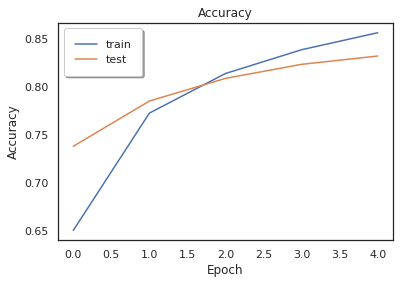

In [143]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'],fancybox=True, framealpha=1, shadow=True, borderpad=1, facecolor='white')
plt.savefig('accuracy.png')
#plt.show()
#plt.savefig('accuracy.png')

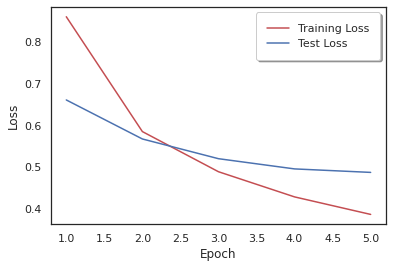

In [144]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'],fancybox=True, framealpha=1, shadow=True, borderpad=1, facecolor='white')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('actual_loss')
plt.show()

In [0]:
#saving model to disk
model2.save("1106937_1dconv_reg.h5")